Now that you know how to load data from a trajectory data (previous [tutorial](loading-trajectory-data-extracted-from-video-using-trafficintelligence-python-library.ipynb)), we will see other existing functionalities. First, we import the necessary modules and load again the objects from the `laurier.sqlite` database. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from trafficintelligence import storage, moving

In [2]:
objects = storage.loadTrajectoriesFromSqlite('../data/12-laurier/laurier.sqlite', 'object')

We would like to know if road users cross a given line. We plot and choose a segment crossed by some, but not all, road users. The segment is defined by its extremal points $p1$ and $p2$.

(-9.436886, 58.733766, 19.6085075, 72.3093425)

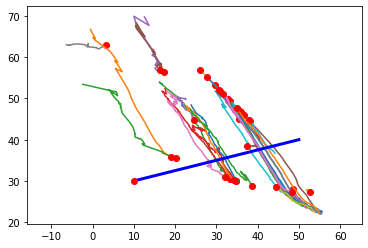

In [3]:
for o in objects:
    o.plot(withOrigin=True)
p1 = moving.Point(10,30)
p2 = moving.Point(50,40)
moving.Point.plotSegment(p1, p2, 'b', withOrigin=True, linewidth=3)
plt.axis('equal')
#o = objects[0]
#moving.Trajectory.getIntersections?

The instants at which the trajectory crosses the segment are returned by the `getInstantsCrossingLane` method of a `MovingObject`. A list is returned, it can be empty (no crossing), or contain all the instants at which the trajectory crosses the line. 

obj 1 crossing from right to left: False (1 crossings)
obj 2 crossing from right to left: True (1 crossings)
obj 3 crossing from right to left: True (1 crossings)
obj 5 crossing from right to left: False (1 crossings)
obj 6 crossing from right to left: True (1 crossings)
obj 9 crossing from right to left: False (1 crossings)
obj 10 crossing from right to left: False (1 crossings)
obj 13 crossing from right to left: True (1 crossings)
obj 16 crossing from right to left: False (1 crossings)
obj 17 crossing from right to left: False (1 crossings)
obj 18 crossing from right to left: False (1 crossings)
obj 19 crossing from right to left: False (1 crossings)
obj 20 crossing from right to left: False (1 crossings)
obj 21 crossing from right to left: True (1 crossings)
obj 22 crossing from right to left: False (1 crossings)
obj 24 crossing from right to left: False (1 crossings)
obj 26 crossing from right to left: False (1 crossings)
obj 29 crossing from right to left: False (1 crossings)
obj

(-9.436886, 58.733766, 19.6085075, 72.3093425)

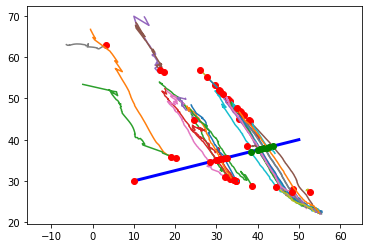

In [4]:
moving.Point.plotSegment(p1, p2, 'b', withOrigin=True, linewidth=3)
for o in objects:
    o.plot(withOrigin=True)
    instants, intersections, rightToLeftOrientations = o.getInstantsCrossingLine(p1, p2, True)
    if len(instants) > 0:
        #p = o.getPositionAtInstant(int(np.floor(instants[0]))) # closest position in the trajectory
        if rightToLeftOrientations[0]:
            intersections[0].plot('or')
        else:
            intersections[0].plot('og')
        print('obj {} crossing from right to left: {} ({} crossings)'
              .format(o.getNum(), rightToLeftOrientations[0], len(instants)))
plt.axis('equal')

Other methods exist for objects with curvilinear trajectories (examples to come) and one can also extract points in a polygon with the static method `Trajectory.getTrajectoryInPolygon`.